In [6]:
from google.colab import files
uploaded = files.upload()


Saving Bank Customer Churn Prediction.csv to Bank Customer Churn Prediction (1).csv


In [7]:
import pandas as pd
df = pd.read_csv('Bank Customer Churn Prediction.csv')
df.head()


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Data Processing

In [8]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [10]:
df.isnull()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


In [12]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [13]:
df.rename(columns={
    'credit_score': 'credit',
    'products_number': 'products',
    'credit_card': 'card',
    'active_member': 'active',
    'estimated_salary': 'salary'
}, inplace=True)


EDA

In [14]:
churn_counts = df['churn'].value_counts()
churn_percent = df['churn'].value_counts(normalize=True) * 100
print("Churn Counts:\n", churn_counts)
print("\nChurn Percent:\n", churn_percent)


Churn Counts:
 churn
0    7963
1    2037
Name: count, dtype: int64

Churn Percent:
 churn
0    79.63
1    20.37
Name: proportion, dtype: float64


In [15]:
df['churn_label'] = df['churn'].map({1: 'Churned', 0: 'Retained'})


In [22]:
import seaborn as sns

In [21]:
import matplotlib.pyplot as plt


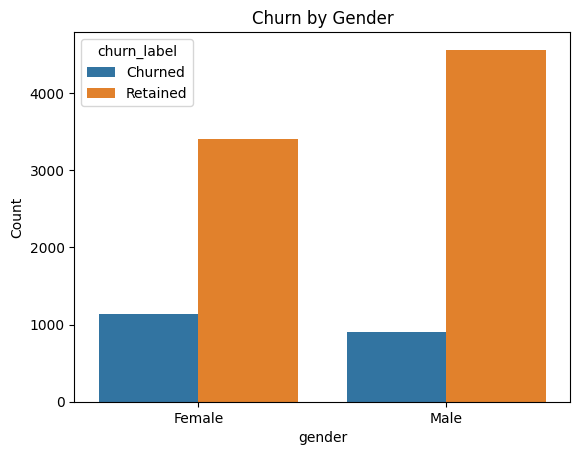

In [23]:
sns.countplot(data=df, x='gender', hue='churn_label')
plt.title('Churn by Gender')
plt.ylabel('Count')
plt.show()


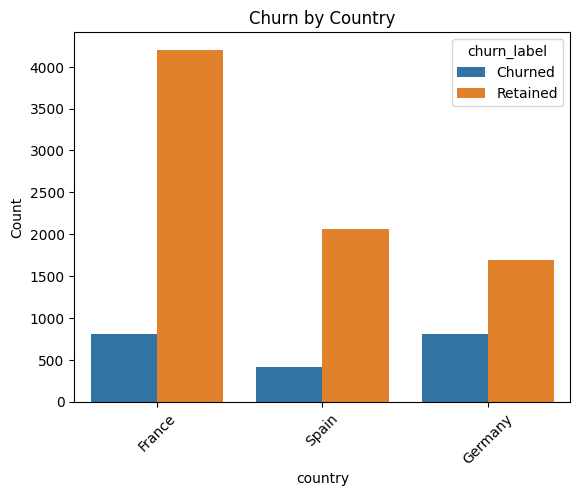

In [24]:
sns.countplot(data=df, x='country', hue='churn_label')
plt.title('Churn by Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


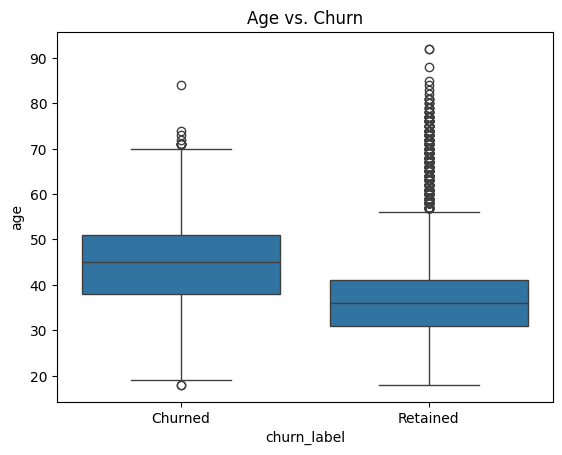

In [25]:
sns.boxplot(data=df, x='churn_label', y='age')
plt.title('Age vs. Churn')
plt.show()


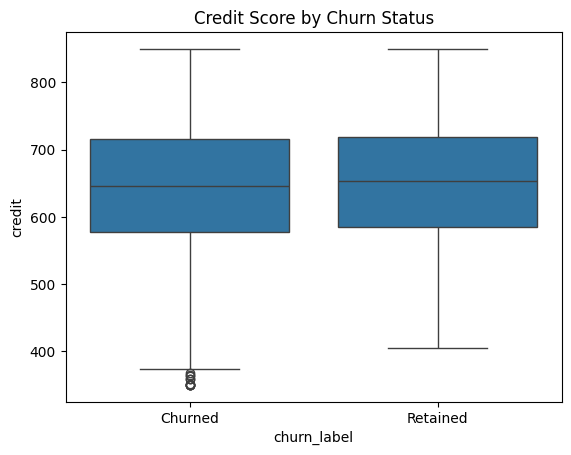

In [26]:
sns.boxplot(data=df, x='churn_label', y='credit')
plt.title('Credit Score by Churn Status')
plt.show()


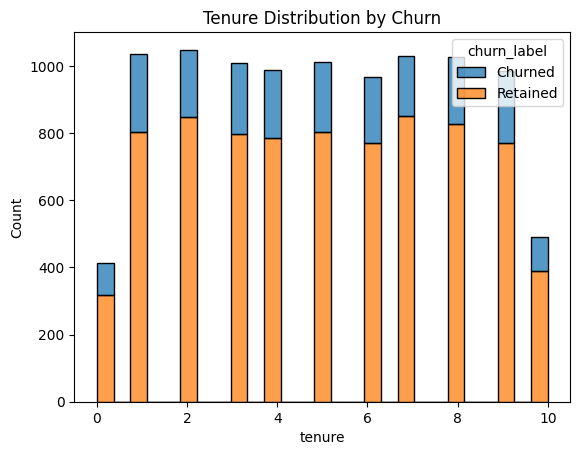

In [27]:
sns.histplot(data=df, x='tenure', hue='churn_label', multiple='stack')
plt.title('Tenure Distribution by Churn')
plt.show()


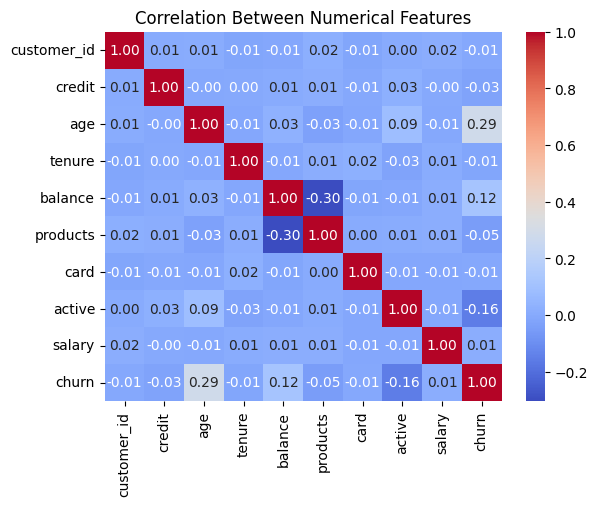

In [28]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Numerical Features')
plt.show()


 Feature Encoding & Logistic Regression Model

In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['gender_encoded'] = le.fit_transform(df['gender'])
df['country_encoded'] = le.fit_transform(df['country'])


In [30]:
X = df[['credit', 'age', 'tenure', 'balance', 'products', 'card', 'active', 'salary', 'gender_encoded', 'country_encoded']]
y = df['churn']


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))


              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.57      0.21      0.31       393

    accuracy                           0.81      2000
   macro avg       0.70      0.59      0.60      2000
weighted avg       0.78      0.81      0.78      2000

ROC-AUC Score: 0.7425116894755927


In [34]:
# Add predictions and churn probability to the original data
df['churn_prob'] = model.predict_proba(X)[:,1]
df['churn_pred'] = model.predict(X)

# Optional: create a risk flag based on threshold
df['risk_flag'] = df['churn_prob'].apply(lambda x: 'High' if x > 0.5 else 'Low')


In [37]:
churn_rate = df['churn'].mean() * 100
print(f"Churn Rate: {churn_rate:.2f}%")


Churn Rate: 20.37%


In [38]:
df['churn_rate'] = churn_rate
df.to_csv('churn_cleaned.csv', index=False)


In [39]:
from google.colab import files
files.download('churn_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>